## Qual o tempo médio de atendimento por tipo de solicitação requisitada?

Para analisarmos esse questionamento, iremos retirar o tempo respectivo a diferença entre a _Data da demanda_ e a _Data da ultima situação_, por fim podemos realizar o agrupamento dos intervalos por pela _descrição do serviço_, obtendo ao final a média dos intervalos de tempo para cada tipo requisitado.

### Importando bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

### Carregando arquivo de análise (dados das solicitações)

In [3]:
df = pd.read_hdf('../../data/processed/solicitacoes156.h5', key='data', format="table")
df.head()

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO,ANO
0,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR PIRIZAL,3587,VASCO DA GAMA,3,2012-05-03,ATENDIDA,2012-05-03,2012
1,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR SEBASTIAO GRANDE,3587,AREIAS,5,2012-05-10,ATENDIDA,2012-05-10,2012
2,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV ANTONIO DE GOES,3578,PINA,6,2012-05-11,ATENDIDA,2012-05-11,2012
3,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEBERIBE,00,AGUA FRIA,2,2012-09-12,ATENDIDA,2012-09-12,2012
4,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEIRA RIO,00,MADALENA,4,2012-08-10,ATENDIDA,2012-08-10,2012


### Processando intervalos de tempo e agrupamento de dados

In [7]:
df = df[df['SITUACAO'] == 'ATENDIDA']
df['INTERVALO'] = df['DATA_ULT_SITUACAO'] - df['DATA_DEMANDA']
df['INTERVALO'] = df['INTERVALO'].apply(lambda x: x.days)
group_df = df.groupby('SERVICO_DESCRICAO')[['INTERVALO']]

### Visualização de dados

In [8]:
group_df.mean()

,INTERVALO
SERVICO_DESCRICAO,
ACAO EDUC. E INFORMATIVA,17.196429
ACENDER CIRCUITO,7.179003
ANALISE DE PROJETO,5.333333
APAGAR CIRCUITO,13.851684
APAGAR LAMPADA,4.397002
AVAL. INST. DE CESTAS DE LIXO,36.303279
AVALIACAO E PARECER TECNICO,2.500000
CAPINACAO DE PRACAS AREAS VERD,35.507538
CAPINACAO EM LOGRADOUROS,30.149276


### Estudo da media de intervalos para execução da solicitação

Tempo médio geral para atender uma solicitação: 18 dias

Serviços que são atendidos no mesmo dia da solitação em média:
	INFRA-ESTRUTURA PARA EVENTOS
	COBRANCAS E TAXAS IRREGULARES
	EXUMACAO
	ROUBO OU SEGURANCA EM CEMITERIO
	SEPULT.EM COVA INFANTIL
	SEPULT.EM GAVETA ADULTO
	SEPULT.EM JASIDUO
	PROJETO DE ILUMINACAO
	ESTRUTURA PARA EVENTOS
	PINTURA EM PONTES E CAIS
	MANUT. RECUP. EM MONUMENTOS
	TUMULO DE FAMILIA
	VELORIO POPULAR
	VELORIO PRINCIPAL
	SEPULT.EM COVA ADULTO

Tempo médio por tipo de serviço solicitado:


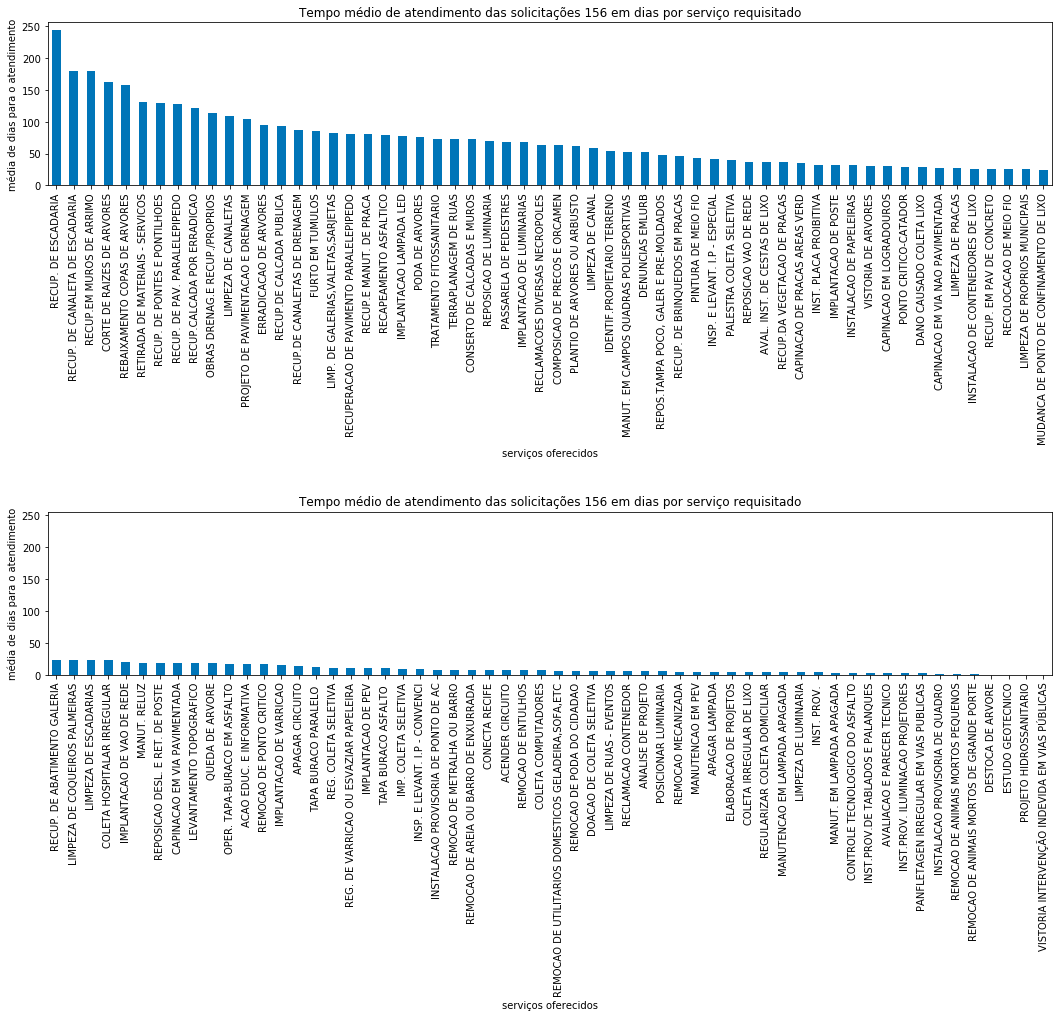

In [9]:
print('Tempo médio geral para atender uma solicitação:', int(round(df['INTERVALO'].mean())), 'dias')

group_sorted = group_df.mean().sort_values(by=['INTERVALO'], ascending=False)
group_sorted_nozero = group_sorted[group_sorted['INTERVALO'] != 0]
group_sorted_iszero = group_sorted[group_sorted['INTERVALO'] == 0]

print('\nServiços que são atendidos no mesmo dia da solitação em média:')
for service in group_sorted_iszero['INTERVALO'].index:
    print('\t' + service)

fig, axes = plt.subplots(nrows=2, ncols=1, sharey=True)
plt.subplots_adjust(hspace=2)

axis = group_sorted_nozero.iloc[:group_sorted_nozero.shape[0]//2,:].plot.bar(
    x=None,
    ax=axes[0],
    y='INTERVALO',
    figsize=(18, 12), 
    legend=False,
    color=(0, 0.46, 0.72),
    title='Tempo médio de atendimento das solicitações 156 em dias por serviço requisitado')
axis.set_ylabel('média de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')

axis = group_sorted_nozero.iloc[group_sorted_nozero.shape[0]//2:,:].plot.bar(
    x=None,
    ax=axes[1],
    y='INTERVALO', 
    figsize=(18, 12),
    color=(0, 0.46, 0.72),
    legend=False,
    title='Tempo médio de atendimento das solicitações 156 em dias por serviço requisitado')
axis.set_ylabel('média de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')

print('\nTempo médio por tipo de serviço solicitado:')

### Estudo do desvio padrão sobre o intervalo de tempo para concluir uma solicitação

Variação do tempo geral para atender uma solicitação: 61 dias

Desvio padrão (variação) de tempo de atendimento por tipo de serviço solicitado:


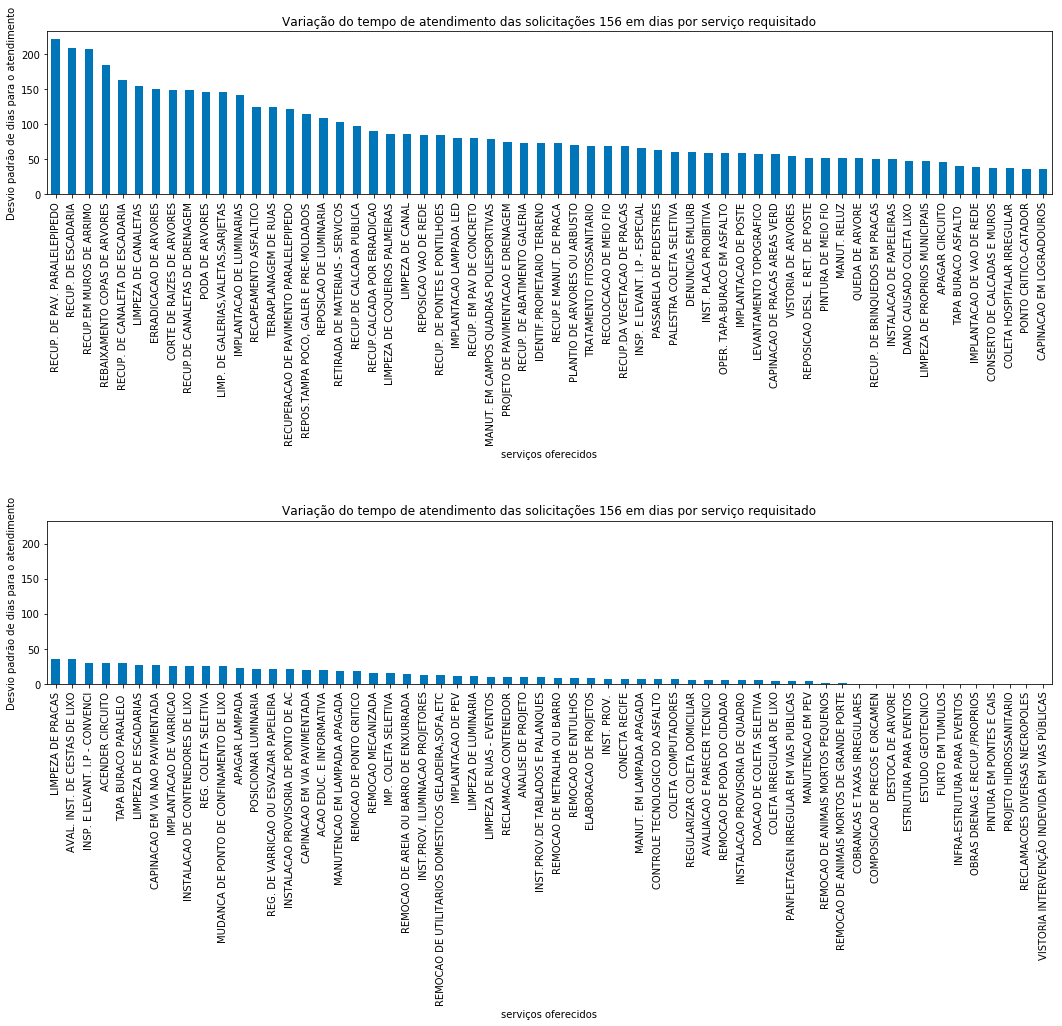

In [10]:
print('Variação do tempo geral para atender uma solicitação:', int(round(df['INTERVALO'].std())), 'dias')

group_sorted = group_df.std().sort_values(by=['INTERVALO'], ascending=False)
group_sorted_nozero = group_sorted[group_sorted['INTERVALO'] != 0]
group_sorted_iszero = group_sorted[group_sorted['INTERVALO'] == 0]

fig, axes = plt.subplots(nrows=2, ncols=1, sharey=True)
plt.subplots_adjust(hspace=2)

axis = group_sorted_nozero.iloc[:group_sorted_nozero.shape[0]//2,:].plot.bar(
    x=None,
    ax=axes[0],
    y='INTERVALO',
    figsize=(18, 12), 
    legend=False,
    color=(0, 0.46, 0.72),
    title='Variação do tempo de atendimento das solicitações 156 em dias por serviço requisitado')
axis.set_ylabel('Desvio padrão de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')

axis = group_sorted_nozero.iloc[group_sorted_nozero.shape[0]//2:,:].plot.bar(
    x=None,
    ax=axes[1],
    y='INTERVALO', 
    figsize=(18, 12), 
    legend=False,
    color=(0, 0.46, 0.72),
    title='Variação do tempo de atendimento das solicitações 156 em dias por serviço requisitado')
axis.set_ylabel('Desvio padrão de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')

print('\nDesvio padrão (variação) de tempo de atendimento por tipo de serviço solicitado:')

## Análise dos máximos e mínimos obtidos

Tempo médio geral para atender uma solicitação: 18 dias

Tempo médio por tipo de serviço solicitado:


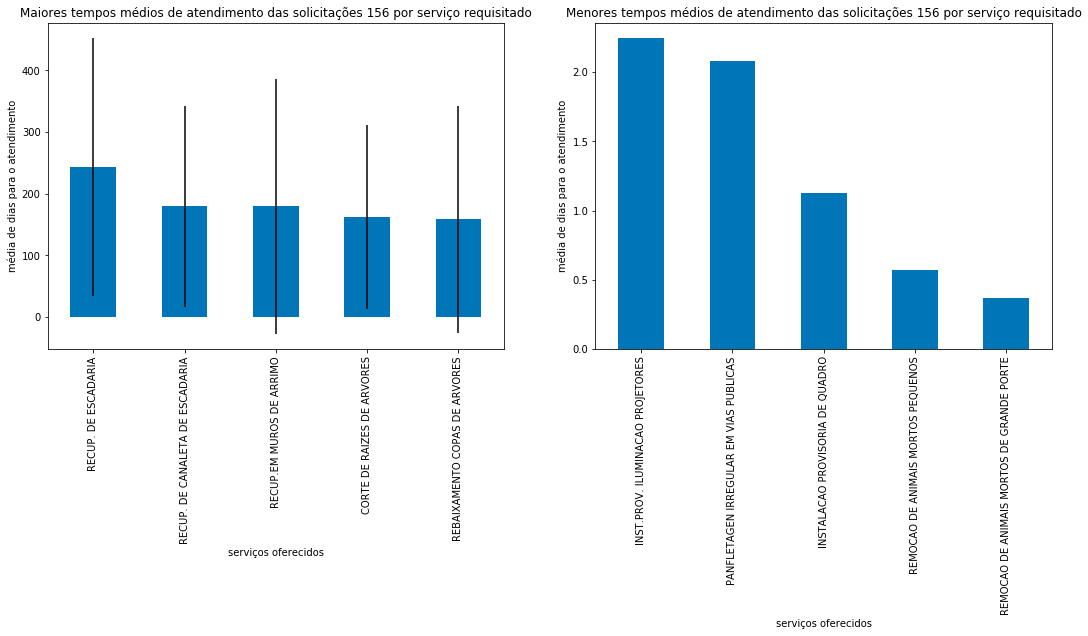

In [12]:
print('Tempo médio geral para atender uma solicitação:', int(round(df['INTERVALO'].mean())), 'dias')

result = pd.concat([group_df.mean(), group_df.std()], axis=1)
result.columns = ['mean', 'std']
result

group_sorted = result.sort_values(by=['mean'], ascending=False)
group_sorted_nozero = group_sorted[group_sorted['mean'] != 0]

fig, axes = plt.subplots(nrows=1, ncols=2)
# plt.subplots_adjust(hspace=2)

axis = group_sorted_nozero.iloc[:5,:].plot.bar(
    x=None,
    ax=axes[0],
    yerr = group_sorted['std'][:5],
    y='mean',
    figsize=(18, 12), 
    legend=False,
    color=(0, 0.46, 0.72),
    title='Maiores tempos médios de atendimento das solicitações 156 por serviço requisitado')
axis.set_ylabel('média de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')

axis = group_sorted_nozero.iloc[-9:-4,:].plot.bar(
    x=None,
    ax=axes[1],
    yerr = group_sorted['std'][-5:],
    y='mean', 
    figsize=(18, 6),
    color=(0, 0.46, 0.72),
    legend=False,
    title='Menores tempos médios de atendimento das solicitações 156 por serviço requisitado')
axis.set_ylabel('média de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')

print('\nTempo médio por tipo de serviço solicitado:')

## Estudo da distribuição do tempo de atendimento

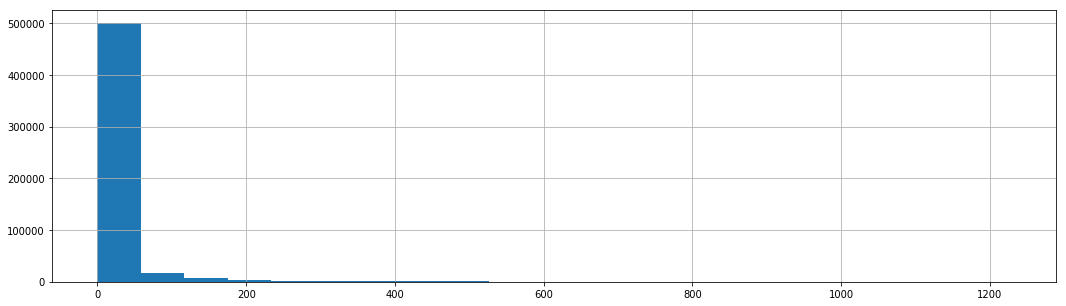

In [13]:
import math

# Número de bins pela formula de sturges: ceil(log2(N) + 1)
bins = math.ceil(math.log2(df['INTERVALO'].shape[0]) + 1)
axis = df['INTERVALO'].hist(figsize=(18, 5), bins=bins)

Distribuição dos tempos de atendimento respectivos a cada tipo de solicitação:


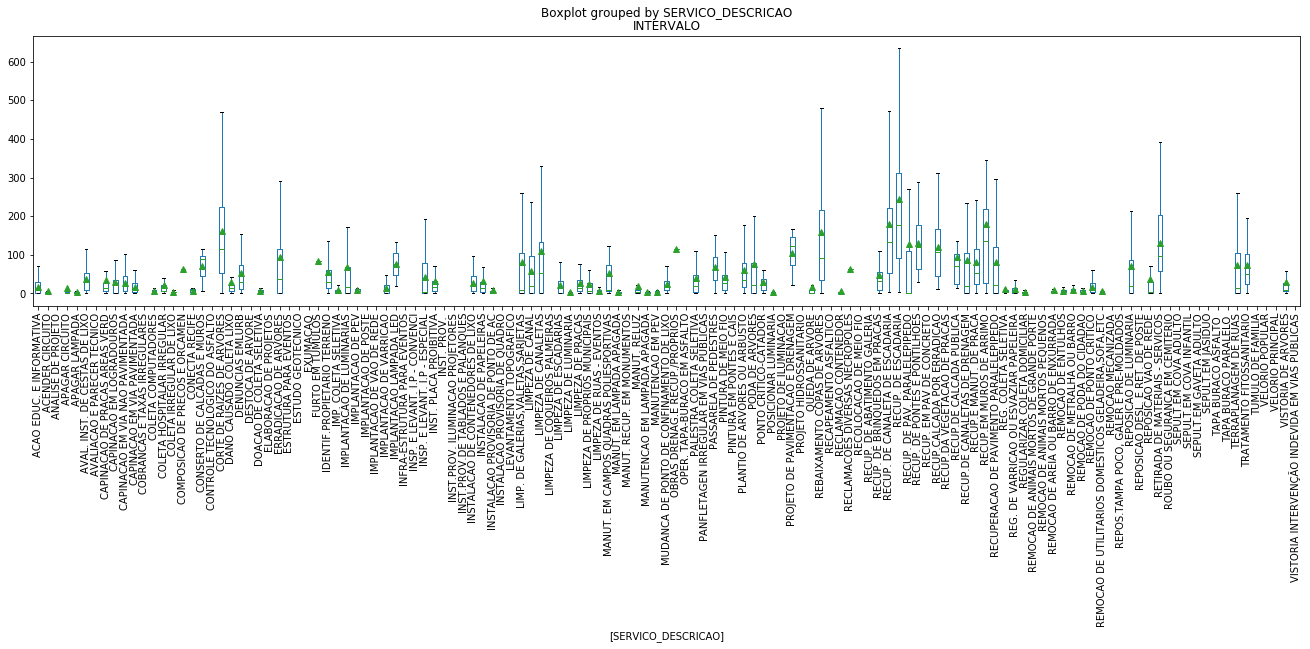

In [14]:
medians = group_df.median()
medians = medians[medians['INTERVALO'] != 0].index
filtered_df = df[['SERVICO_DESCRICAO', 'INTERVALO']][df['SERVICO_DESCRICAO'].isin(medians)]

filtered_df.boxplot(
    by='SERVICO_DESCRICAO',
    showfliers=False,
    figsize=(22, 5),
    showmeans=True,
    grid=False,
    rot=90)

print('Distribuição dos tempos de atendimento respectivos a cada tipo de solicitação:')

Correlação do tempo médio para atendimento da solicitação com o passar dos anos:
O valor inscrito na parte superior ou inferior de cada barra, é referente a contagem daquele serviço


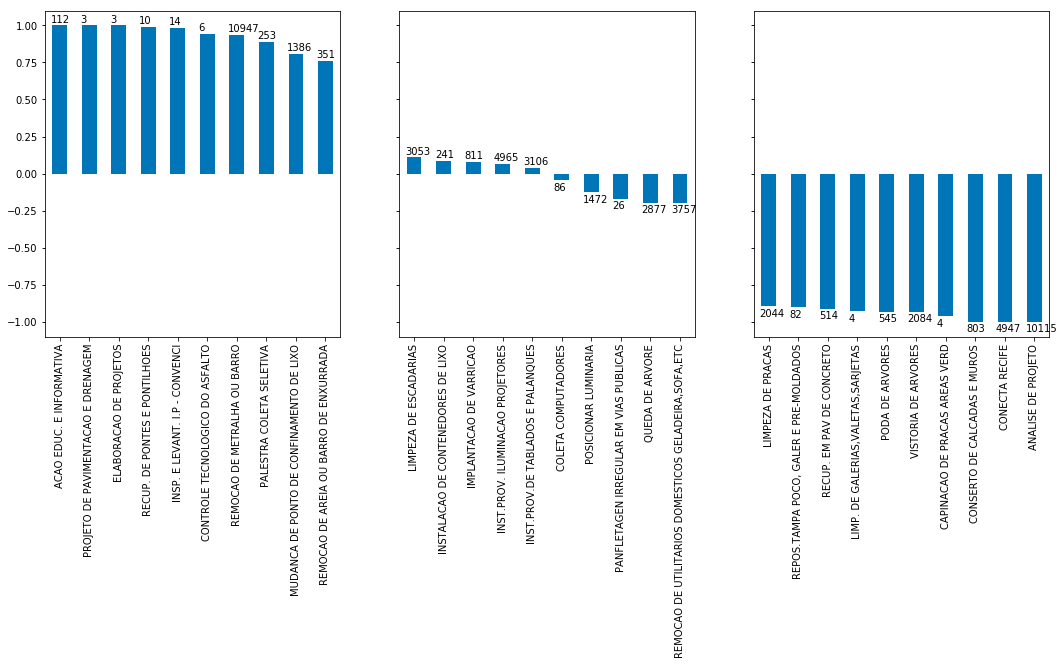

In [30]:
group_ASI_df = df.groupby(['ANO', 'SERVICO_DESCRICAO'])[['INTERVALO']].mean().reset_index()
pivot_ASI = group_ASI_df.pivot('ANO', 'SERVICO_DESCRICAO', 'INTERVALO')
pivot_ASI.index = [0, 1, 2, 3, 4, 5, 6]
pivot_ASI.columns = list(pivot_ASI.columns)
pivot_ASI['ANO'] = list(range(2012, 2019))
corr_year = pivot_ASI.corr()['ANO'][:-1].dropna()

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

corr_df = corr_year.sort_values(ascending=False)

ax = corr_df[:10].plot.bar(
    color=(0, 0.46, 0.72),
    figsize=(18, 5),
    ax=axes[0])

x_offset = -0.3
y_offset = 0.02
for p, v in zip(ax.patches, range(10)):
    b = p.get_bbox()
    val = group_df.count().loc[corr_df.index.values[v], 'INTERVALO']
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

ax = corr_df[41:51].plot.bar(
    color=(0, 0.46, 0.72),
    figsize=(18, 5),
    ax=axes[1])

x_offset = -0.3
y_offset = 0.02
for p, v in zip(ax.patches, range(41, 51)):
    if v == 46:
        y_offset = -0.07
    b = p.get_bbox()
    val = group_df.count().loc[corr_df.index.values[v], 'INTERVALO']
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

ax = corr_df[-10:].plot.bar(
    color=(0, 0.46, 0.72),
    figsize=(18, 6),
    ax=axes[2])

x_offset = -0.3
y_offset = -0.07
for p, v in zip(ax.patches, range(31, 41)):
    b = p.get_bbox()
    val = group_df.count().loc[corr_df.index.values[v], 'INTERVALO']
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

print('Correlação do tempo médio para atendimento da solicitação com o passar dos anos:')
print('O valor inscrito na parte superior ou inferior de cada barra, é referente a contagem daquele serviço')

### Conclusões

**Qual o tempo médio de atendimento por tipo de solicitação requisitada?**

O tempo médio geral para realizar um atendimento é de 18 dias, serviços como: recuperação estrutural e relacionados a iluminação publica, em média tomam mais tempo, cerca de 100 dias ou mais. Já serviços como: remoção de animais mortos e de instalações provisorias tendem a ter atendimento rápido, cerca de 2 dias ou menos. Alguns serviços demotraram comportamente inusitado, sendo atendidos no mesmo dia em que foi requisitado na média, alguns são: cobranças de taxas irregulares, exumação, velório e levantamento topográfico.

O tempo para execução de um atendimento pode variar em cerca de 61 dias para mais ou para menos. alguns serviços como: recuperação de praças, brinquendo, instalação de luminarias e poda de copas de árvores, podem variar cerca de 150 dias para mais ou menos. Já os serviços mais rápidos, como: remoção de animais mortos e submissão de aceitação de projetos, possui variação baixa, cerca de 1 dia mais ou menos.

A distribuição dos intervalos indica que normalmente as solicitações são atendidas nos primeiros 60 dias desde sua requisição, isso é confirmado pelo gráfico de boxplot que normalmente possui valores de medias e medianas proximos de 60 dias ou abaixo, com releção aos valores maximais de cada distribuição.

Já a correlação do tempo médio de cada tipo de serviço com relação ao ano, demostrou que a maioria dos serviços teve tempo médio sendo reduzindo ao longo do ano, oferecendo um serviço mais rápido para os cidadões, é o caso de serviços funerários e de manutenção ou implantação de luminárias e quadras, isso é serviços estruturais. No entando, também notasse que alguns serviços pioraram, tendo um aumento no tempo médio de execução, como serviços educacionais, e de coleta que estão demorando mais tempo para serem execultados com o passar do ano.